### All Necessary Libraries 

In [221]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 


In [222]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [223]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Data Cleaning

In [225]:
#missing 
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

The dataset is converted into two general sets based on Reigon from 122th index, we can make a column based on the Reigon 

1: "Bejaia Reigon Dataset" 
2: "Sidi-Bel Abbes Reigin Dataset" 

Add new columns with region 

In [226]:
df.loc[:122,"Region"]=0 #Bejiaia 
df.loc[122:,"Region"]=1

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [228]:
df[['Region']]=df[['Region']].astype(int)

In [229]:
### Remove the null values 
df=df.dropna().reset_index()

In [230]:
df.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [231]:
#remove the 122nd rown 
df=df.drop(122).reset_index(drop=True)

In [232]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [233]:
#fix spaces in column names 
df.columns=df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [234]:
### Change the required columns as Integer and float data type 

In [235]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        243 non-null    int64 
 1   day          243 non-null    int32 
 2   month        243 non-null    int32 
 3   year         243 non-null    int32 
 4   Temperature  243 non-null    int32 
 5   RH           243 non-null    int32 
 6   Ws           243 non-null    int32 
 7   Rain         243 non-null    object
 8   FFMC         243 non-null    object
 9   DMC          243 non-null    object
 10  DC           243 non-null    object
 11  ISI          243 non-null    object
 12  BUI          243 non-null    object
 13  FWI          243 non-null    object
 14  Classes      243 non-null    object
 15  Region       243 non-null    int32 
dtypes: int32(7), int64(1), object(8)
memory usage: 23.9+ KB


In [236]:
### Changing the other columns to float datatype
objects=[features for features in df.columns if df[features].dtypes=='O']

In [237]:
for i in objects: 
    if i!='Classes':
        df[i]=df[i].astype(float)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    int64  
 1   day          243 non-null    int32  
 2   month        243 non-null    int32  
 3   year         243 non-null    int32  
 4   Temperature  243 non-null    int32  
 5   RH           243 non-null    int32  
 6   Ws           243 non-null    int32  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  Region       243 non-null    int32  
dtypes: float64(7), int32(7), int64(1), object(1)
memory usage: 23.9+ KB


In [239]:
df.describe()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,122.316872,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,71.540562,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,0.000000,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,60.500000,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,121.000000,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,184.500000,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,245.000000,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [240]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### EDA AND FEATURE ENGINEERING

In [241]:
## Lets save clean 
df.to_csv('Algerian_forest_fires_dataset_CLEAN.csv',index=False)

In [242]:
df_copy=df

In [243]:
#month day year feature
df_copy=df.drop(['day','month','year'],axis=1)


In [244]:
# Assuming df_copy is your DataFrame
df_copy['Classes'] = df_copy['Classes'].astype(str)  # Convert 'Classes' to string type
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)


In [245]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

C:\Users\giria\AppData\Local\Temp\ipykernel_35668\3430174719.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


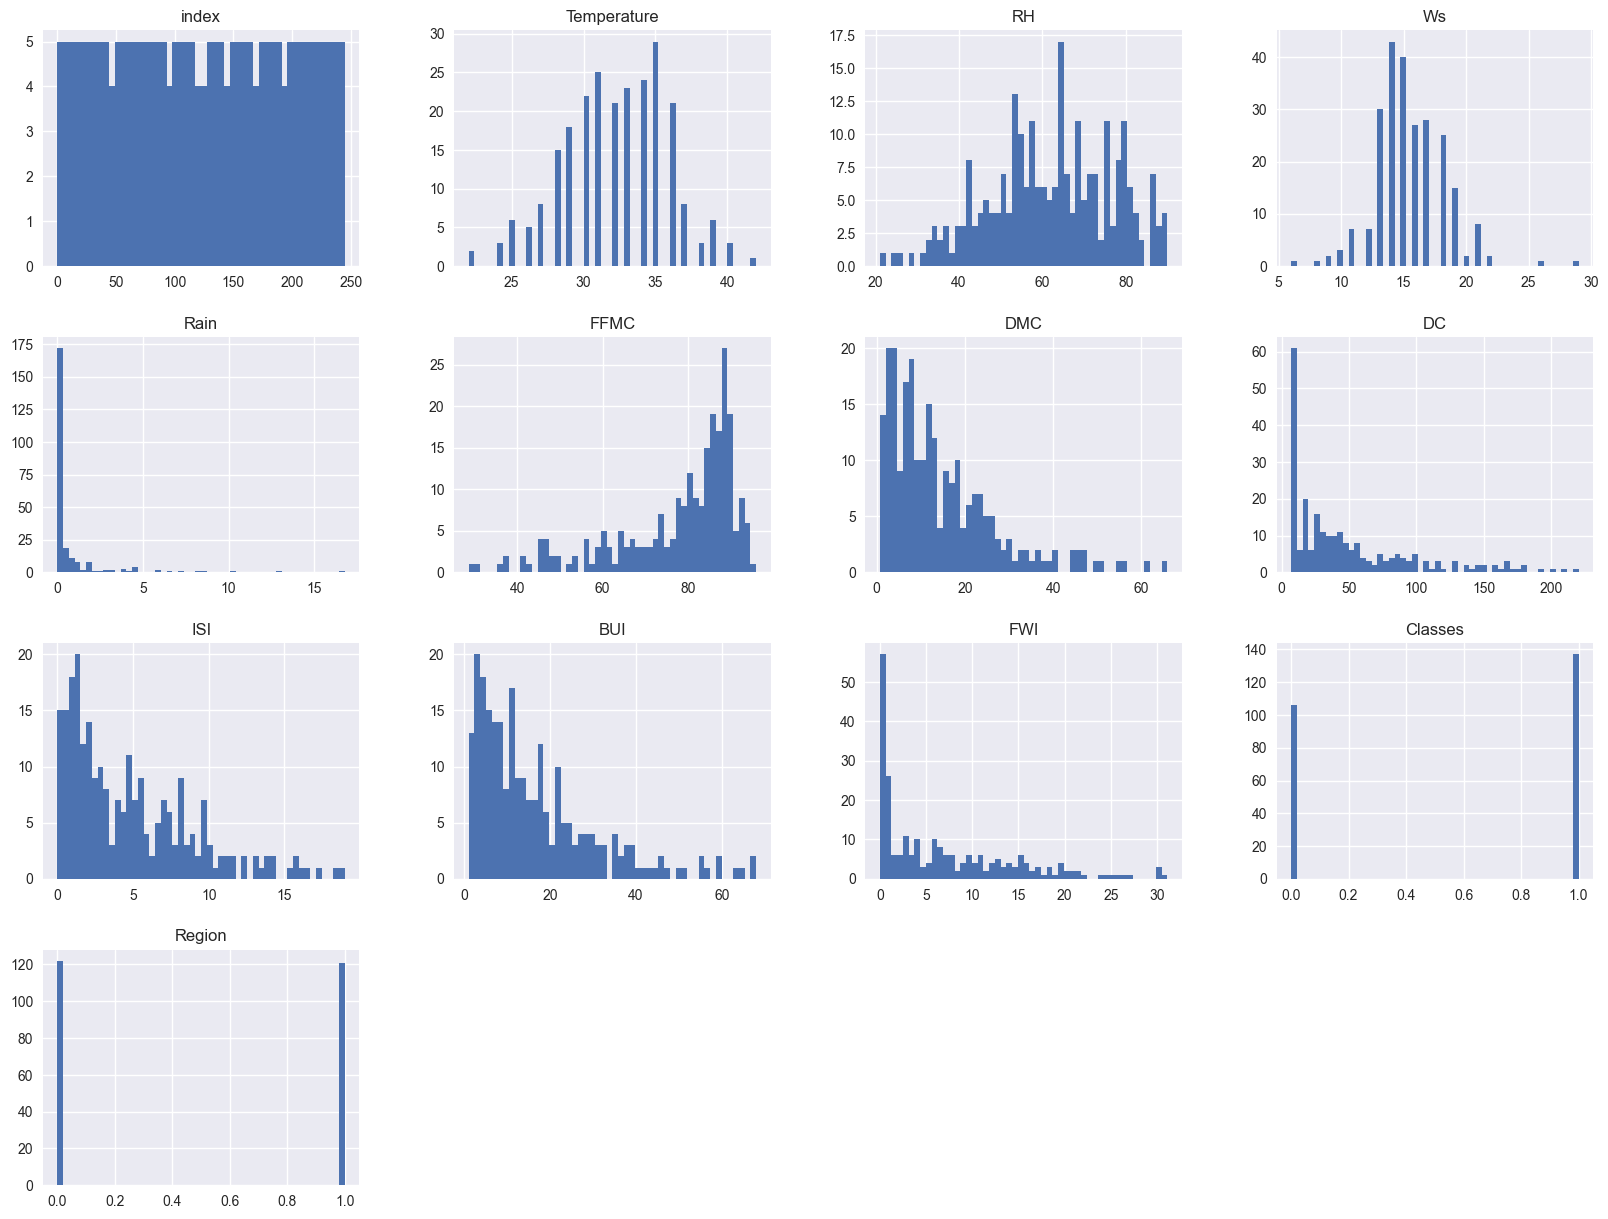

In [246]:
#density plot for all features
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()


Here we can see a lot of feeatures are not following a normal distribution so a lot of features are either left skewed or right skewed

In [247]:
df_copy.corr()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
index,1.000000,0.217385,-0.378265,-0.170876,-0.031468,0.227708,0.258884,0.056385,0.281342,0.181099,0.253037,0.176627,0.869435
Temperature,0.217385,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.378265,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.170876,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.031468,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.227708,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.258884,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.056385,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.281342,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.181099,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408


<Axes: >

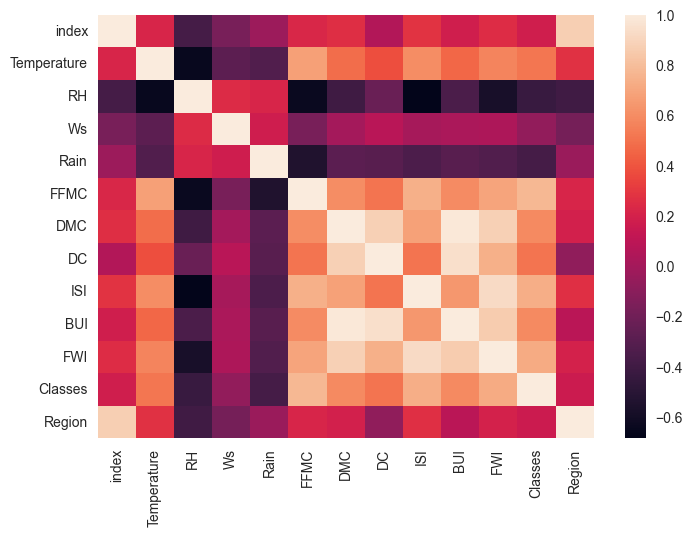

In [248]:
sns.heatmap(df_copy.corr())

<Axes: >

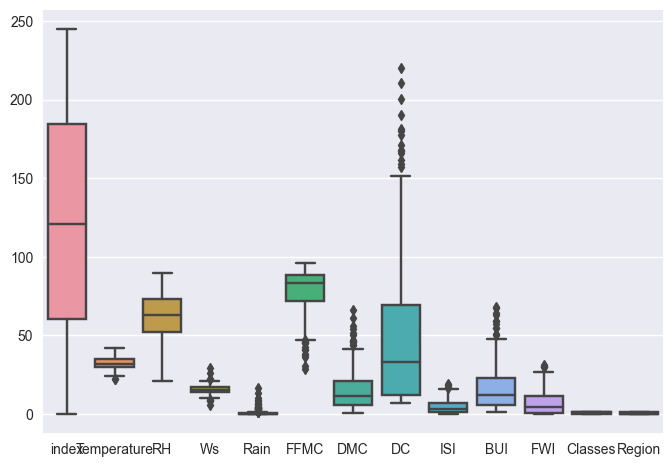

In [249]:
### Box Plots for outliers 
sns.boxplot(df_copy)

In [250]:
df=pd.read_csv('Algerian_forest_fires_dataset_CLEAN.csv')
df.drop('index',axis=1,inplace=True)

In [251]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [252]:
df_copy.head()
df_copy.drop('index',axis=True,inplace=True)

In [253]:
data=df_copy.copy()

In [254]:
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [255]:
X=df_copy.drop('FWI',axis=1)
y=df_copy['FWI']

In [256]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [257]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [258]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

<Axes: >

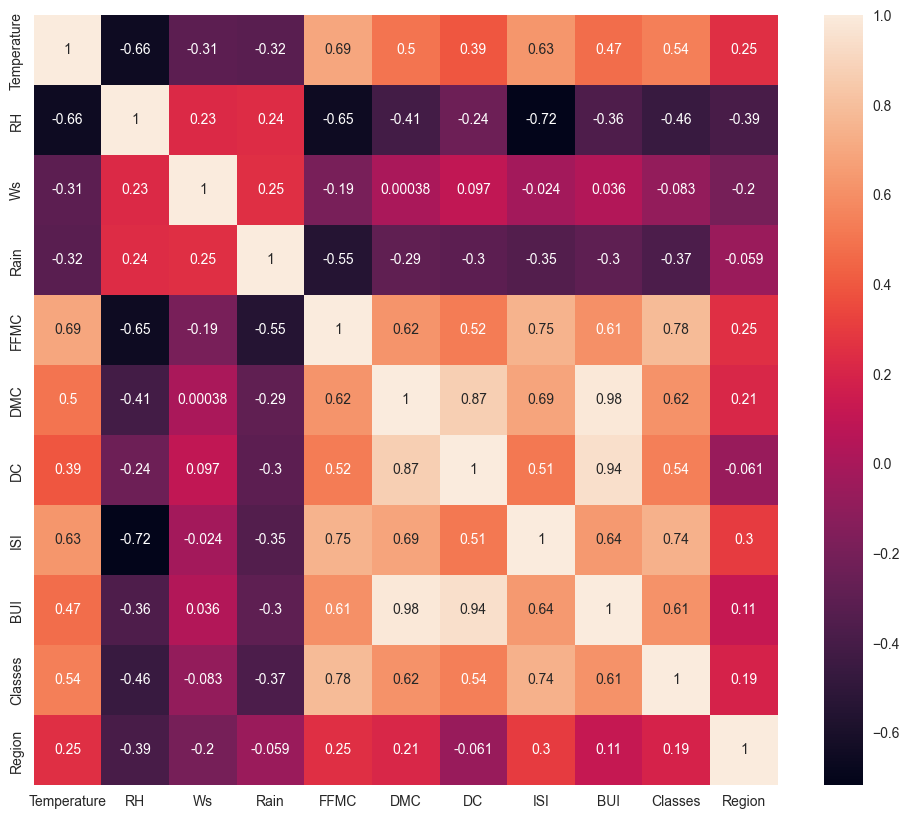

In [259]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [260]:
def correleation(dataset,thershold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len (corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]>thershold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [261]:
corr_features=correleation(X_train,0.85)

In [262]:
#drop these features as they are highly highly correlated with other so using it can become uncessary
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape


((182, 9), (61, 9))

In [271]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# To confirm the file has been saved
print("Scaler saved as 'scaler.pkl'")

Scaler saved as 'scaler.pkl'


C:\Users\giria\AppData\Local\Temp\ipykernel_35668\3656969508.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train After Scaling')

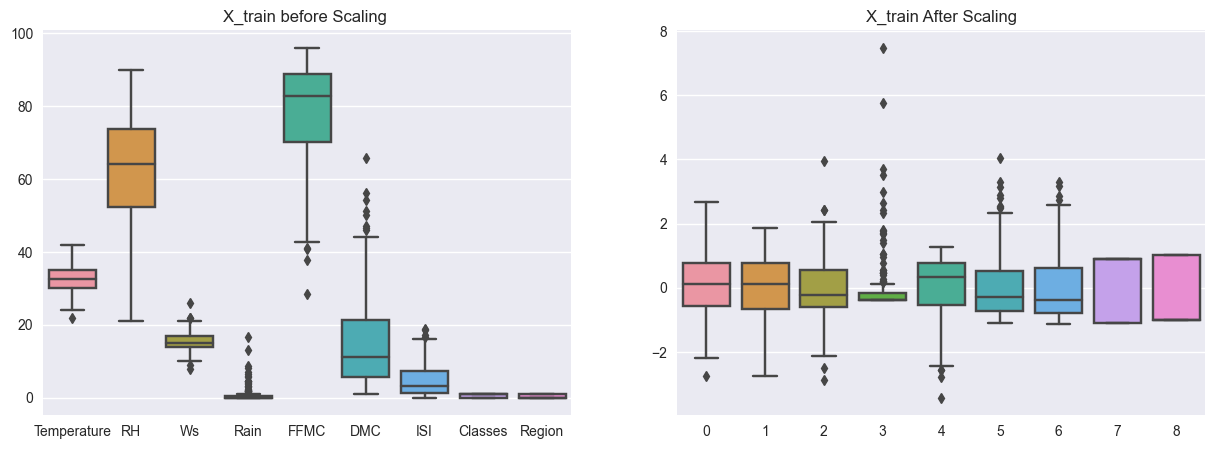

In [264]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before Scaling ')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

### MODEL TRAINING

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error #robust to outliers 
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
regressor=LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred=regressor.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error ", mae)
print("R2 score",score)


Mean Absolute Error  32.63239756717752
R2 score -42.735439282843615


c:\Users\giria\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Lasso Regression 

Mean absolute error  1.133175994914409
R2 score  0.9492020263112388


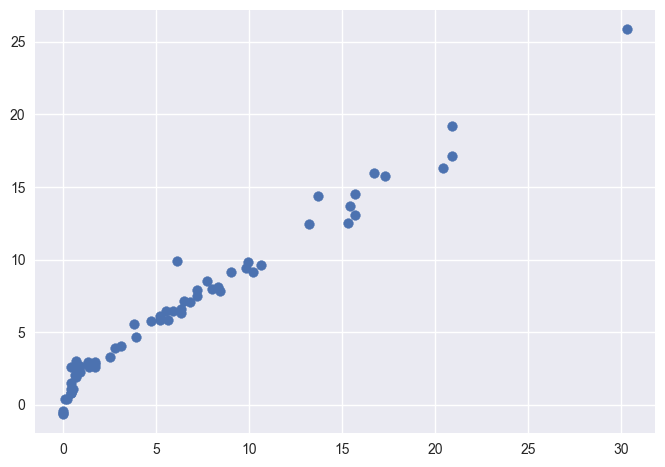

In [266]:
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error ", mae)
print("R2 score ",score)
plt.scatter(y_test,y_pred)

### RIDGE REGRESSION

Mean absolute error  0.5642305340105717
R2 score  0.9842993364555512


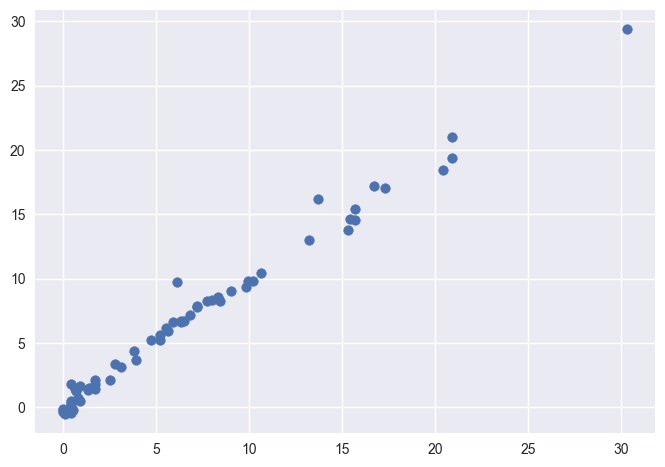

In [267]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error ", mae)
print("R2 score ",score)
plt.scatter(y_test,y_pred)


### ELASTIC NET

Mean absolute error  1.8822353634896
R2 score  0.8753460589519703


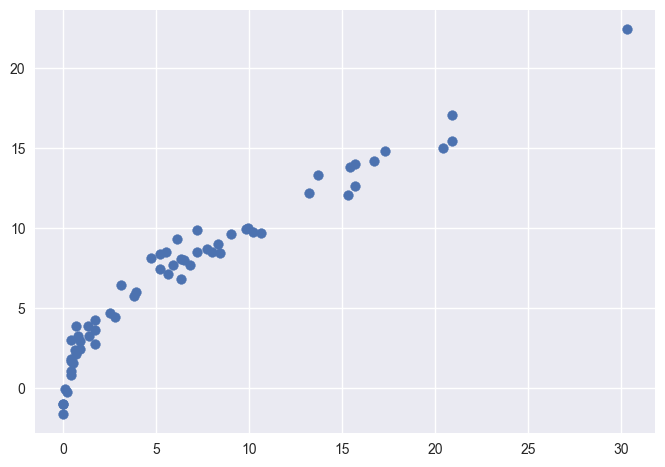

In [268]:
from sklearn.linear_model import ElasticNet
net=ElasticNet()
net.fit(X_train_scaled,y_train)
y_pred=net.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error ", mae)
print("R2 score ",score)
plt.scatter(y_test,y_pred)


### CROSS VALIDATION LASSO 

In [269]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train,y_train)
lassocv.predict(X_test)


array([ 7.86615487,  7.3449536 , -0.07087647,  4.92972268,  6.68181156,
        1.94140616,  2.02458162,  7.53189025,  1.94231328,  3.33635352,
        0.53915757, 10.31045751,  9.30582138, 17.1487618 , 18.25947416,
        1.7425706 ,  1.87495743, -0.46454737,  6.95930658,  2.89718044,
        1.85696082,  0.18730163,  6.10482017,  0.13979228, 21.26747653,
        4.94947247,  5.49647288,  9.4928801 , -0.55393165,  9.8961322 ,
        6.40494398, -0.15427489, 10.067699  , 14.30630495,  1.58728279,
        0.9476157 ,  1.59145352,  5.8378266 , -0.30230788, -0.22274135,
        6.13138486,  1.94933953,  8.14905679, -0.68489741, 15.5078696 ,
        8.02928249,  8.4504379 ,  1.41901721, 13.08490899,  1.16770802,
       29.58312951,  5.33939078, 17.34031713, 19.29472155, 13.55551487,
       15.97791096,  1.12243158,  9.03698434,  3.6674834 , 14.5101439 ,
        5.08118829])

Mean absolute error: 0.5642305340106782
R2 score: 0.9842993364555536


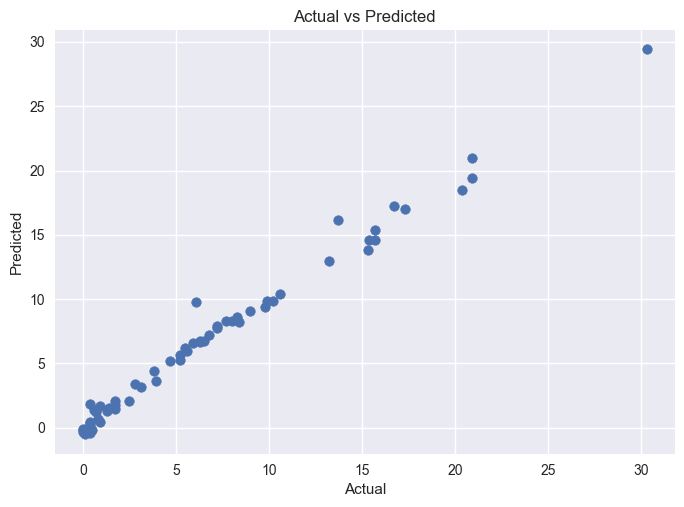

Model saved as 'ridge_cv_model.pkl'


In [270]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined and scaled appropriately

# Create a RidgeCV object with multiple alphas to choose from, or you can specify your own list of alphas
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True)

# Fit the model
ridge_cv.fit(X_train_scaled, y_train)

# Predict using the model
y_pred = ridge_cv.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("R2 score:", score)

# Plotting
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

# Save the model to a pickle file
with open('ridge_cv_model.pkl', 'wb') as file:
    pickle.dump(ridge_cv, file)

# To confirm the file has been saved
print("Model saved as 'ridge_cv_model.pkl'")
